In [71]:
import tweepy
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Gathering (Extraindo)
### Autentificação
Informações necessárias para acessar a API do Twitter.

#### Fontes de Dados
- *`twitter_archive_enhanced.csv`*
- *`image_predictions.tsv`*
- *`API`*

In [16]:
# auth
consumer_key = 'NjfShVBOGEvdrI44lacgEfN1B'
consumer_secret = 'Zt2nnR2r8B4FnRy7Ja1NhSIGTlGNiUIgl8YiHR06jmRsLDMxLi'
access_token = '562344526-8h0jZd7sOqwjzuegiGo0tMWQ8owjnewI85T7OQDI'
access_secret = 'o0cF73fcAZ0aU4MQIR67JBC47g4FnlHw9pditUTKKFnYU'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [17]:
# dataset principal WeRateDogs
df_tt = pd.read_csv('twitter-archive-enhanced (1).csv')

# segundo dataset Prediciton de cachorros
df_pred = pd.read_csv('image-predictions (1).tsv', sep='\t')

In [18]:
# exportando tweets da api
with open('tweet_json.txt','a',encoding = 'utf8') as f:
    for tweet_id in list(df_tt['tweet_id']):
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except: 
            pass

In [19]:
# importando apenas as colunas de retweet e favorite
df_api = []
with open('tweet_json.txt', 'r') as tt_json:
    for i in tt_json:
        status = json.loads(i)
        
        df_api.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                       })

In [20]:
df_tt_api = pd.DataFrame(df_api, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

# Assess (Acessando)
### Verificação das informações do Dataset
Visualiza o Dataset de várias maneiras diferentes com o intuito de verificar erros e conhecer melhor os dados.

#### Funções
- *`.head()`*
- *`.info()`*
- *`.tail()`*
- *`.isnull()`*
- *`.describe()`*
- *`.sample()`*
- *`.value_counts()`*
- *`.sort_values()`*
- *`.duplicated()`*
- *`.unique()`*

In [21]:
df_tt.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [22]:
df_tt_api.sort_values('tweet_id').head()

,tweet_id,retweet_count,favorite_count
2649,675145476954566656,931,2169
3532,758828659922702336,4079,11688
2648,758828659922702336,4080,11688
1765,758828659922702336,4080,11688
882,758828659922702336,4080,11688


In [23]:
df_pred.head(3).sort_values('tweet_id')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [24]:
df_tt.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [25]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [26]:
df_tt[df_tt['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [27]:
df_tt.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
df_tt[df_tt.retweeted_status_user_id.isnull()].name.value_counts().head(5)

None       680
a           55
Lucy        11
Charlie     11
Oliver      10
Name: name, dtype: int64

# Clean (Limpando)
### Lista e limpa os valores errados presentes no dataset analisados anteriormente
Deixa o dataset mais organizado e com informações realmente relevantes

#### Problemas de Qualidade (quality)
- `1. Apenas tweets (não considerar RT)`
- `2. Transformar a coluna de id em String`
- `3. Nome dos cachorros errados (ex: "the", "a")`
- `4. As notas podem ser decimal, e a coluna está como inteiro`
- `5. Mudar a coluna "timestamp" para Data`
- `6. Colunas retweet_status estão como float`
- `7. Extrair apenas os valores de "source" da coluna (ex: "Iphone")`
- `8. Retirar a URL no final da linha da coluna "text"`

#### Problemas Arrumação (tidy)
- `1. Remover colunas desnecessárias para a análise`
- `2. Transformar as 4 (quatro) colunas finais em apenas uma coluna `
- `3. 3 Datasets onde deveria ser apenas um (realizar join) `

In [29]:
# Criando copias do dataset para limpeza
df_tt_clean = df_tt.copy()
df_pred_clean = df_pred.copy()
df_api_clean = df_tt_api.copy()

#### - Problema Qualidade 01:
`Apenas tweets (não considerar RT)`

Deixar o dataset apenas com tweets organicos, sem retweets.

##### Code:

In [30]:
df_tt_clean = df_tt_clean[df_tt_clean['retweeted_status_user_id'].isnull()]

##### Test:

In [31]:
df_tt_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1748,679062614270468097,NaN,NaN,2015-12-21 22:15:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chompsky. He lives up to his name. 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679062614...,11,10,Chompsky,None,None,None,None
2236,668154635664932864,NaN,NaN,2015-11-21 19:50:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Fun dogs here. Top one clearly an athlete. Bot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668154635...,9,10,None,None,None,None,None
1862,675432746517426176,NaN,NaN,2015-12-11 21:51:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday. Here's some golden puppers. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675432746...,12,10,None,None,None,None,None
1008,747594051852075008,NaN,NaN,2016-06-28 00:54:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Again w the sharks guys. This week is about do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747594051...,11,10,None,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None


#### - Problema Qualidade 02:
`Transformar a coluna de tweet_id em String`

Deixar como string por ser um campo de texto e para podermos realizar o join posteriormente

##### Code:

In [32]:
df_tt_clean['tweet_id'] = df_tt_clean.tweet_id.astype(str)

##### Test:

In [33]:
df_tt_clean['tweet_id'].head(5)

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

#### - Problema Qualidade 03:
`Nome dos cachorros errados (ex: "the", "a")`

- such
- the
- a
- an

Retirar os nomes inválidos e transforma-los em "None"

##### Code:

In [34]:
dic_errados = {'a': 'None',
               'the': 'None',
               'an': 'None',
               'such': 'None'}

df_tt_clean.name = df_tt_clean.name.replace(dic_errados)

##### Test:

In [35]:
df_tt_clean.name.value_counts().head(10)

None       750
Lucy        11
Charlie     11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Lola         8
Winston      8
Sadie        8
Name: name, dtype: int64

#### - Problema Qualidade 04:
`As notas podem ser decimal, e a coluna está como inteiro`

- Após verificar alguns tweets, notei que existe um tweets onde o numerador do rating é '13.5' e na coluna ele aparece como '13' e a coluna não estava como float.

- É necessário alterar a linha e mudar o tipo de dado da coluna

##### Code:

In [36]:
# denominador
df_tt_clean['rating_denominator'] = df_tt_clean.rating_denominator.astype(np.float16)

# numerador
df_tt_clean['rating_numerator'] = df_tt_clean.rating_numerator.astype(np.float16)

In [37]:
# selecionando o id do tweet a alterar o numerador
df_tt_clean.loc[df_tt_clean['name'] == 'Bella'].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5.0,10.0,Bella,None,None,None,None
60,880465832366813184,NaN,NaN,2017-06-29 16:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880465832...,12.0,10.0,Bella,None,None,None,None
1089,737800304142471168,NaN,NaN,2016-06-01 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's ubering home after a few ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737800304...,10.0,10.0,Bella,None,None,None,None


In [38]:
# alterando o numerador
df_tt_clean.rating_numerator[df_tt_clean['tweet_id'] == '883482846933004288'] = df_tt_clean.rating_numerator[df_tt_clean['tweet_id'] == '883482846933004288'].replace(5.0, 13.5)

##### Test:

In [39]:
df_tt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float16
rating_denominator            2175 non-null float16
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float16(2), float64(4), o

In [40]:
df_tt_clean[df_tt_clean['tweet_id'] == '883482846933004288']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.5,10.0,Bella,None,None,None,None


#### - Problema Qualidade 05:
`Mudar a coluna "timestamp" para Data`

- Deixar as colunas com seu tipo de dado ideal

##### Code:

In [41]:
df_tt_clean['timestamp'] = pd.to_datetime(df_tt_clean['timestamp'])

##### Test:

In [42]:
df_tt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float16
rating_denominator            2175 non-null float16
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[n

#### - Problema Qualidade 06:
`Colunas retweet_status estão como float`

- O Ideal é que estas colunas estejam como str (por causa dos valores None)

##### Code:


In [43]:
df_tt_clean.retweeted_status_id = df_tt_clean.retweeted_status_id.astype('str')
df_tt_clean.retweeted_status_user_id = df_tt_clean.retweeted_status_user_id.astype('str')

#### - Problema Qualidade 07:
`Extrair apenas os valores de "source" da coluna (ex: "Iphone")`

- Utilizar regex para extrair o valor final da coluna source

##### Code:


In [44]:
df_tt_clean['source'] = df_tt_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

##### Test:

In [45]:
df_tt_clean.source.head(5)

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

#### - Problema Arrumação 01:
`Remover colunas desnecessárias para a análise`

Remover colunas desnecessárias.

##### Code:

In [46]:
df_tt_clean.drop(['in_reply_to_status_id',
                  'in_reply_to_user_id',
                  'retweeted_status_id',
                  'retweeted_status_user_id',
                  'retweeted_status_timestamp',
                  'expanded_urls'], axis=1, inplace=True)

##### Test:

In [47]:
df_tt_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None


#### - Problema Arrumação 02:
`Transformar as 4 (quatro) colunas finais em apenas uma coluna`

Usar o MELT para mescar as informações em uma só coluna.

##### Code:

In [48]:
df_tt_clean = pd.melt(df_tt_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'name', 'rating_numerator', 'rating_denominator' ],
                                   value_vars=['doggo', 'puppo', 'floofer', 'pupper'],
                                   var_name='stage', value_name='tipo_cachorro')

In [49]:
df_tt_clean = df_tt_clean.sort_values('tipo_cachorro').drop_duplicates('tweet_id', keep='last')

##### Test:

In [50]:
df_tt_clean.tipo_cachorro.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: tipo_cachorro, dtype: int64

#### - Problema Arrumação 03:
`3 Datasets onde deveria ser apenas um (realizar join)`

Realizar join e juntar todos os 3 datasets.

##### Code:

In [51]:
# deixando os id como string
df_pred_clean['tweet_id'] = df_pred_clean['tweet_id'].astype(str)
df_api_clean['tweet_id'] = df_api_clean['tweet_id'].astype(str)

In [52]:
# deixando apenas as informações que os id dos tweets estejam no dataset principal
df_only_id_api = df_api_clean[df_api_clean['tweet_id'].isin(list(df_tt_clean['tweet_id']))]
df_only_id_img = df_pred_clean[df_pred_clean['tweet_id'].isin(list(df_tt_clean['tweet_id']))]

In [66]:
# merge 1
df_tt_clean_merge1 = df_tt_clean.merge(df_only_id_img, on='tweet_id', how='outer')

# merge 2
df_final = df_tt_clean_merge1.merge(df_only_id_api, on='tweet_id', how='outer')

##### Teste:

* Decidi deixar em meu dataset apenas as informações condizentes com o dataset principal `twitter_archive_enhanced.csv` 
* Apenas os `ID` da primeira base de dados

In [59]:
df_final.head()

,tweet_id,timestamp,source,text,name,rating_numerator,rating_denominator,stage,tipo_cachorro,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,666826780179869698,2015-11-18 03:54:28+00:00,Twitter for iPhone,12/10 simply brilliant pup https://t.co/V6ZzG4...,None,12.0,10.0,doggo,None,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,...,0.359383,True,teddy,0.148759,False,West_Highland_white_terrier,0.106007,True,NaN,NaN
1,666835007768551424,2015-11-18 04:27:09+00:00,Twitter for iPhone,These are Peruvian Feldspars. Their names are ...,None,10.0,10.0,doggo,None,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,...,0.448459,True,toy_poodle,0.124030,True,teddy,0.110183,False,NaN,NaN
2,666837028449972224,2015-11-18 04:35:11+00:00,Twitter for iPhone,My goodness. Very rare dog here. Large. Tail d...,None,3.0,10.0,doggo,None,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,...,0.442113,False,armadillo,0.114071,False,common_iguana,0.043255,False,NaN,NaN
3,666983947667116034,2015-11-18 14:18:59+00:00,Twitter for iPhone,This is a curly Ticonderoga named Pepe. No fee...,None,11.0,10.0,doggo,None,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,...,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False,NaN,NaN
4,666996132027977728,2015-11-18 15:07:24+00:00,Twitter for iPhone,This is Carll. He wants to be a donkey. But al...,Carll,10.0,10.0,doggo,None,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,...,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False,NaN,NaN


In [60]:
df_final.to_csv('twitter_archive_master_2.csv', encoding='UTF-8', sep=';')

In [67]:
df_final.drop_duplicates(subset='tweet_id', keep='last', inplace=True)

In [68]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 4361
Data columns (total 22 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
name                  2175 non-null object
rating_numerator      2175 non-null float16
rating_denominator    2175 non-null float16
stage                 2175 non-null object
tipo_cachorro         2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
retweet_count 

In [64]:
df_final.head()

,tweet_id,timestamp,source,text,name,rating_numerator,rating_denominator,stage,tipo_cachorro,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,666826780179869698,2015-11-18 03:54:28+00:00,Twitter for iPhone,12/10 simply brilliant pup https://t.co/V6ZzG4...,None,12.0,10.0,doggo,None,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,...,0.359383,True,teddy,0.148759,False,West_Highland_white_terrier,0.106007,True,NaN,NaN
1,666835007768551424,2015-11-18 04:27:09+00:00,Twitter for iPhone,These are Peruvian Feldspars. Their names are ...,None,10.0,10.0,doggo,None,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,...,0.448459,True,toy_poodle,0.124030,True,teddy,0.110183,False,NaN,NaN
2,666837028449972224,2015-11-18 04:35:11+00:00,Twitter for iPhone,My goodness. Very rare dog here. Large. Tail d...,None,3.0,10.0,doggo,None,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,...,0.442113,False,armadillo,0.114071,False,common_iguana,0.043255,False,NaN,NaN
3,666983947667116034,2015-11-18 14:18:59+00:00,Twitter for iPhone,This is a curly Ticonderoga named Pepe. No fee...,None,11.0,10.0,doggo,None,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,...,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False,NaN,NaN
4,666996132027977728,2015-11-18 15:07:24+00:00,Twitter for iPhone,This is Carll. He wants to be a donkey. But al...,Carll,10.0,10.0,doggo,None,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,...,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False,NaN,NaN


In [182]:
df_final.to_csv('twitter_archive_master_teste.csv', encoding='UTF-8', sep=';')

#### - Insight 01:
`Diferença gigantesca entre os tweets onde temos o estágio do cachorro`

Maioria dos tweets não possuem o estágio e estão como 'None'

In [110]:
count_tipos = df_final.groupby('tipo_cachorro').size().reset_index(name='countador')

In [121]:
count_tipos

,tipo_cachorro,countador
0,None,1831
1,doggo,75
2,floofer,10
3,pupper,234
4,puppo,25


<BarContainer object of 5 artists>

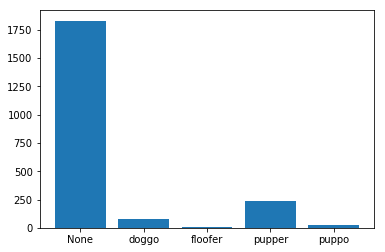

In [115]:
#plt.subplot(300)
plt.bar(count_tipos.tipo_cachorro, count_tipos.countador)

#### - Insight 02:
`A maioria dos tweests foram publicados pela plataforma "iphone"`

Relação de dispositivos

In [117]:
count_source = df_final.groupby('source').size().reset_index(name='contador')

In [128]:
count_source.sort_values('contador')

,source,contador
0,TweetDeck,11
1,Twitter Web Client,31
3,Vine - Make a Scene,91
2,Twitter for iPhone,2042


<BarContainer object of 4 artists>

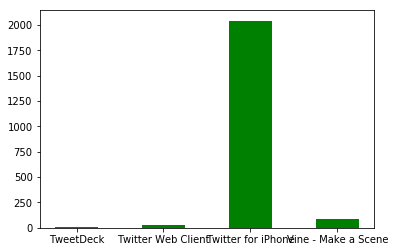

In [148]:
plt.bar(count_source.source, count_source.contador, width=0.5, bottom=0.2, color='green')

#### - Insight 03:
`Verificando a relação de quantas vezes um cachorro com o mesmo nome (ou o mesmo cachorro) foi mencionado`

Notamos que ainda temos vários cachorros sem nome mencionados, mais uma vez o None Prevaleceu.

In [177]:
count_nome = df_final.groupby('name').size().reset_index(name='contador')

In [178]:
rank_nome = count_nome[count_nome['contador'] >= 8].sort_values('contador')

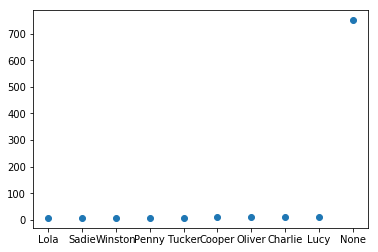

In [179]:
plt.scatter(rank_nome.name, rank_nome.contador)